## LSTM Model to predict vessel status

## Table of Contents
1. [Description](#model-selection)
2. [Further Datapreparation](#further-datapreparation)
3. [Model Script](#model-script)
4. [Detailed Explanations](#explanation)

## Model Selection

The problem at hand is a binary classification task to predict the navigational status of vessels: "Under way using engine" versus "Engaged in fishing." After experimenting with various approaches, including Random Forest and CNN, an LSTM-based neural network was chosen for its ability to model sequential dependencies in time-series data. The LSTM architecture was selected due to its effectiveness in capturing temporal patterns in features such as Speed Over Ground (SOG), Course Over Ground (COG), and Heading.

---

## Feature Engineering

Feature engineering was a critical step in preparing the dataset for modeling. Key steps included:

1. **Normalization**: SOG values were normalized using MinMaxScaler to ensure all features were on a similar scale.
2. **Cyclical Encoding**: Circular features like COG and Heading were encoded using sine and cosine transformations to preserve their cyclical nature.
4. **Initial Course Adjustment**: The initial COG was subtracted from all COG and Heading values to standardize the directionality across sequences.

---

## Hyperparameter Tuning

Hyperparameter tuning was conducted using a combination of manual experimentation and automated tools like Keras Tuner. Key hyperparameters tuned included:

1. **Number of LSTM Layers and Units**: Experiments with single and multi-layer one- and bi-directional LSTM architectures led to the final choice of the detailed model.
2. **Dropout Rates**: Dropout rates were applied after each LSTM layer to mitigate overfitting.
3. **Batch Size and Learning Rate**: A batch size of 32 and the Adam optimizer with default learning rates provided the best results.
4. **Activation Functions**: The final output layer used a sigmoid activation function for binary classification.

---

## Implementation

The LSTM model was implemented using TensorFlow/Keras. The architecture consisted of:

- Two LSTM layers (64 and 32 units) with return sequences enabled for the first layer.
- Dropout layers after each LSTM layer.
- A Dense layer with 32 units and ReLU activation.
- A final Dense layer with a sigmoid activation function for binary classification.

Training was conducted with early stopping to monitor validation loss, with a patience of 10 epochs to prevent overfitting. The model was trained for up to 200 epochs, with validation split set to 20% of the training data.

---

## Evaluation Metrics

The model’s performance was evaluated using:

1. **Accuracy**
2. **F1 Score**
3. **Precision and Recall**
4. **Confusion Matrix**
5. **ROC Curve and AUC**

---

## Comparative Analysis

The LSTM model outperformed other approaches, including:

1. **Baseline Random Forest Model**: Achieved an accuracy of 0.68–0.78, but struggled to recognize certain classes and lacked temporal modeling capabilities.
2. **CNN Architecture**: While capable of capturing spatial patterns, the CNN overfitted and did not leverage temporal dependencies effectively.
3. **Flattened Data Approach**: Flattening sequences into vectors led to faster computation but resulted in overfitting and lower generalization performance.

The final LSTM model’s ability to capture temporal dependencies, combined with robust feature engineering and careful hyperparameter tuning, resulted in a significant performance improvement, making it the best-performing model for this task.



## Further Datapreparation

In [2]:
import os
import shutil
import pandas as pd

# Define the source and destination folders
source_folder = '../5_Data_Pipeline/time_sets_st_shortened'
destination_folder = '../5_Data_Pipeline/input/engaged_in_fishing'

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over each file in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(source_folder, filename)
        
        # Try to read the CSV file
        try:
            df = pd.read_csv(file_path)

            # Check if 'Navigational status' column exists and contains the value 'Underway using engine'
            if 'Navigational status' in df.columns and 'Engaged in fishing' in df['Navigational status'].values:
                # If the condition is met, copy the file to the destination folder
                shutil.copy(file_path, os.path.join(destination_folder, filename))
                # print(f"Copied: {filename}")
        except Exception as e:
            print(f"Could not process {filename}: {e}")

print("Script execution completed.")

Script execution completed.


## Model Script

Found 6944 fishing files in ../5_Data_Pipeline/input/engaged_in_fishing
Found 13913 underway files in ../5_Data_Pipeline/input/underway_using_engine
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_211757470_20240328_0541-20240328_0741_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_211757470_20240328_0741-20240328_0941_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_211757470_20240328_0941-20240328_1141_standardized_60s.csv with feature shape 

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_219005583_20240530_0023-20240530_0223_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_219005583_20240530_2023-20240530_2223_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_219005583_20240530_2223-20240531_0023_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishin

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_220127000_20240408_1450-20240408_1649_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_220127000_20240408_1650-20240408_1849_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishing file ../5_Data_Pipeline/input/engaged_in_fishing\filtered_220127000_20240408_1850-20240408_2049_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded fishin

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_219635000_20240313_1007-20240313_1207_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_219646000_20240407_1058-20240407_1258_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_219646000_20240407_2317-20240408_0117_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_229849000_20240625_0310-20240625_0510_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_229849000_20240625_0510-20240625_0710_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_229860000_20240411_0232-20240411_0432_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_257064430_20240324_2132-20240324_2331_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_257064430_20240328_1132-20240328_1331_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_257064430_20240331_2132-20240331_2331_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_259016000_20240301_0920-20240301_1120_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_259016000_20240305_0720-20240305_0920_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_259016000_20240525_1418-20240525_1618_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pip

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_305167000_20240418_0531-20240418_0731_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_305184000_20240310_1736-20240310_1936_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_305184000_20240310_1936-20240310_2136_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_518998865_20240618_1142-20240618_1342_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_518998877_20240305_1449-20240305_1648_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_518998877_20240305_1649-20240305_1848_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_538006249_20241127_0517-20241127_0716_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_538006310_20240404_2324-20240405_0124_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_538006310_20240406_2220-20240407_0020_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

C:\Users\goeck\AppData\Local\Temp\ipykernel_6400\1828173415.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_636022982_20240318_1838-20240318_2038_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_636022982_20240320_1239-20240320_1438_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
Loaded underway file ../5_Data_Pipeline/input/underway_using_engine\filtered_636022986_20240310_0516-20240310_0716_standardized_60s.csv with feature shape (120, 5).
Converted Timestamp to datetime.
Extracted hour from Timestamp.
Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.
L

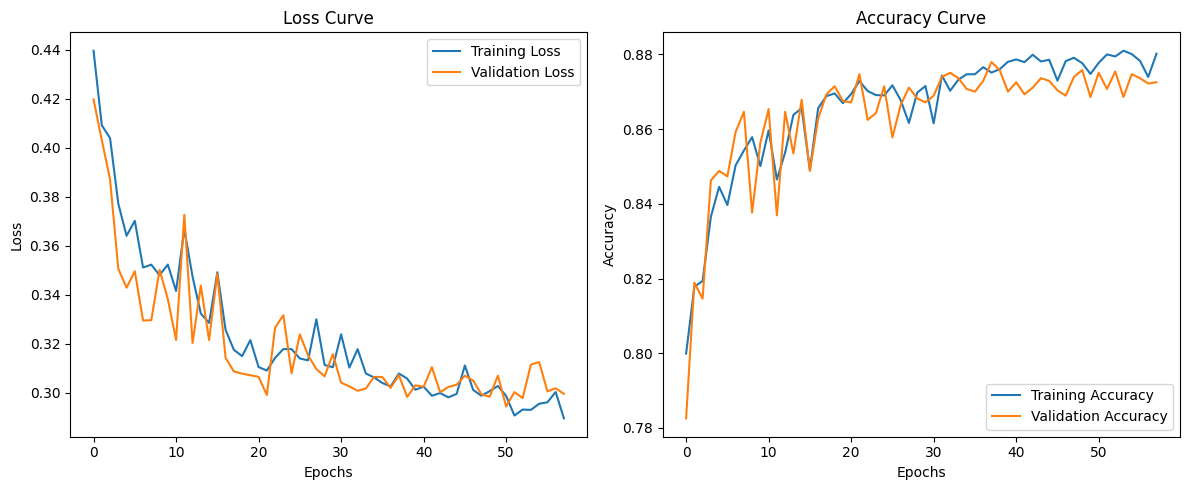

87/87 [==============================] - 2s 13ms/step


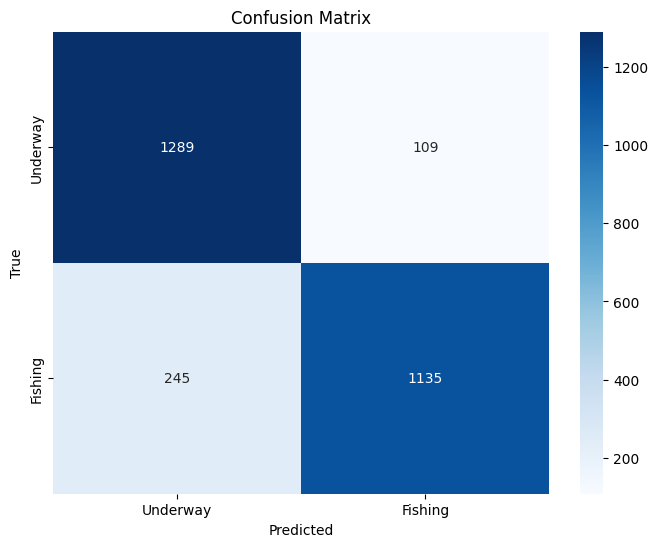

Classification Report:
              precision    recall  f1-score   support

    Underway       0.84      0.92      0.88      1398
     Fishing       0.91      0.82      0.87      1380

    accuracy                           0.87      2778
   macro avg       0.88      0.87      0.87      2778
weighted avg       0.88      0.87      0.87      2778

Found 354 misclassified sequences.
Misclassified filenames saved to misclassified_files.txt


In [1]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Global debug flag
DEBUG = True

def debug_print(message):
    """Print debugging messages when DEBUG is True."""
    if DEBUG:
        print(message)

def process_timestamp(df):
    """
    Process the Timestamp column of a DataFrame to extract cyclical time features.
    Assumes 'Timestamp' is in a parseable datetime format.
    """
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    debug_print("Converted Timestamp to datetime.")
    df['hour'] = df['Timestamp'].dt.hour
    debug_print("Extracted hour from Timestamp.")
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    debug_print("Applied cyclical encoding: created 'hour_sin' and 'hour_cos'.")
    return df

def load_data_with_time(data_dir_fishing, data_dir_underway):
    """
    Load CSV files from two directories (one for each class) and return:
      X: NumPy array of shape (n_samples, sequence_length, n_features)
      y: NumPy array of shape (n_samples,)
      file_names: NumPy array of shape (n_samples,) containing the source file for each sample.
    
    This version processes the 'Timestamp' column to include cyclical time features.
    """
    X, y, file_names = [], [], []
    
    fishing_files = glob.glob(os.path.join(data_dir_fishing, '*.csv'))
    underway_files = glob.glob(os.path.join(data_dir_underway, '*.csv'))
    debug_print(f"Found {len(fishing_files)} fishing files in {data_dir_fishing}")
    debug_print(f"Found {len(underway_files)} underway files in {data_dir_underway}")
    
    required_cols = ['Timestamp', 'SOG', 'COG', 'Heading']
    
    # Process fishing files (label 0)
    for file in fishing_files:
        try:
            df = pd.read_csv(file)
            if not all(col in df.columns for col in required_cols):
                debug_print(f"File {file} missing required columns. Skipping.")
                continue
            df = process_timestamp(df)
            features = df[['SOG', 'COG', 'Heading', 'hour_sin', 'hour_cos']].values
            X.append(features)
            y.append(0)
            file_names.append(file)
            debug_print(f"Loaded fishing file {file} with feature shape {features.shape}.")
        except Exception as e:
            debug_print(f"Error loading {file}: {e}")
    
    # Process underway files (label 1)
    for file in underway_files:
        try:
            df = pd.read_csv(file)
            if not all(col in df.columns for col in required_cols):
                debug_print(f"File {file} missing required columns. Skipping.")
                continue
            df = process_timestamp(df)
            features = df[['SOG', 'COG', 'Heading', 'hour_sin', 'hour_cos']].values
            X.append(features)
            y.append(1)
            file_names.append(file)
            debug_print(f"Loaded underway file {file} with feature shape {features.shape}.")
        except Exception as e:
            debug_print(f"Error loading {file}: {e}")
    
    X = np.array(X)
    y = np.array(y)
    file_names = np.array(file_names)
    debug_print(f"Total samples loaded: {len(X)}")
    return X, y, file_names

def scale_features(X):
    """
    Scale the SOG, COG, and Heading features using StandardScaler.
    The cyclical time features (hour_sin and hour_cos) are left unchanged.
    """
    debug_print("Starting feature scaling...")
    n_samples, seq_length, n_features = X.shape
    X_reshaped = X.reshape(-1, n_features)
    scaler = StandardScaler()
    X_reshaped[:, :3] = scaler.fit_transform(X_reshaped[:, :3])
    X_scaled = X_reshaped.reshape(n_samples, seq_length, n_features)
    debug_print("Feature scaling completed.")
    return X_scaled, scaler

def undersample_data(X, y, file_names=None):
    """
    Undersample the majority class to match the minority class count.
    If file_names is provided, it is undersampled accordingly.
    """
    debug_print("Starting undersampling process...")
    indices_class0 = np.where(y == 0)[0]
    indices_class1 = np.where(y == 1)[0]
    debug_print(f"Class 0 sample count: {len(indices_class0)}")
    debug_print(f"Class 1 sample count: {len(indices_class1)}")
    min_count = min(len(indices_class0), len(indices_class1))
    debug_print(f"Minority class count: {min_count}")
    selected_indices_class0 = np.random.choice(indices_class0, min_count, replace=False)
    selected_indices_class1 = np.random.choice(indices_class1, min_count, replace=False)
    combined_indices = np.concatenate([selected_indices_class0, selected_indices_class1])
    np.random.shuffle(combined_indices)
    X_balanced = X[combined_indices]
    y_balanced = y[combined_indices]
    if file_names is not None:
        file_names_balanced = file_names[combined_indices]
        debug_print(f"After undersampling, balanced data shape: X: {X_balanced.shape}, y: {y_balanced.shape}, file_names: {file_names_balanced.shape}")
        return X_balanced, y_balanced, file_names_balanced
    else:
        debug_print(f"After undersampling, balanced data shape: X: {X_balanced.shape}, y: {y_balanced.shape}")
        return X_balanced, y_balanced

def build_improved_model(input_shape, learning_rate=0.001):
    """
    Build and compile an improved LSTM model with debugging.
    """
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    debug_print("Added Bidirectional LSTM layer with 64 units and return_sequences=True")
    model.add(Dropout(0.5))
    debug_print("Added Dropout layer with 50% rate after first LSTM")
    model.add(LSTM(32))
    debug_print("Added second LSTM layer with 32 units")
    model.add(Dropout(0.3))
    debug_print("Added Dropout layer with 30% rate after second LSTM")
    model.add(Dense(32, activation='relu'))
    debug_print("Added Dense layer with 32 units and ReLU activation")
    model.add(Dense(1, activation='sigmoid'))
    debug_print("Added final Dense layer with sigmoid activation for binary classification")
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    debug_print("Compiled the improved model with Adam optimizer and binary crossentropy loss.")
    debug_print("Improved model summary:")
    model.summary(print_fn=debug_print)
    return model

class DebugCallback(Callback):
    """Custom callback to print debug information after each epoch."""
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        log_str = ", ".join([f"{k}: {v:.4f}" for k, v in logs.items()])
        debug_print(f"Epoch {epoch+1} - {log_str}")

def save_misclassified_files(file_names, y_true, y_pred, output_file="misclassified_files.txt"):
    """
    Save the filenames of misclassified sequences to a text file.
    """
    misclassified_idx = np.where(y_true != y_pred.flatten())[0]
    misclassified_files = file_names[misclassified_idx]
    debug_print(f"Found {len(misclassified_files)} misclassified sequences.")
    with open(output_file, "w") as f:
        for file in misclassified_files:
            f.write(file + "\n")
    debug_print(f"Misclassified filenames saved to {output_file}")

def plot_learning_curves(history):
    """Plot training and validation loss and accuracy."""
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test, file_names_test=None):
    """Evaluate the model, display confusion matrix and classification report,
       and save misclassified filenames if available.
    """
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Underway', 'Fishing'], yticklabels=['Underway', 'Fishing'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Underway', 'Fishing']))
    
    # Save misclassified file names if available
    if file_names_test is not None:
        save_misclassified_files(file_names_test, y_test, y_pred, output_file="misclassified_files.txt")

def main():
    data_dir_fishing = '../5_Data_Pipeline/input/engaged_in_fishing'
    data_dir_underway = '../5_Data_Pipeline/input/underway_using_engine'
    
    # Load data along with filenames
    X, y, file_names = load_data_with_time(data_dir_fishing, data_dir_underway)
    debug_print(f"Shape of loaded data X: {X.shape}")
    debug_print(f"Shape of labels y: {y.shape}")
    debug_print(f"Number of loaded filenames: {len(file_names)}")
    
    # Undersample to balance classes (including filenames)
    X, y, file_names = undersample_data(X, y, file_names)
    debug_print(f"Data after undersampling - X shape: {X.shape}, y shape: {y.shape}, file_names shape: {file_names.shape}")
    
    # Shuffle the dataset (shuffle filenames accordingly)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    file_names = file_names[indices]
    debug_print("Data has been shuffled.")
    
    # Feature scaling
    X, scaler = scale_features(X)
    debug_print("Scaled features with StandardScaler.")
    
    # Split into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    file_names_train, file_names_test = file_names[:split_index], file_names[split_index:]
    debug_print(f"Training samples: {len(X_train)}; Testing samples: {len(X_test)}")
    
    seq_length = X_train.shape[1]
    n_features = X_train.shape[2]
    input_shape = (seq_length, n_features)
    debug_print(f"Input shape for the LSTM: {input_shape}")
    
    model = build_improved_model(input_shape)
    
    callbacks = [
        DebugCallback(),
        EarlyStopping(monitor='val_accuracy', patience=20, verbose=1),
        ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
        TensorBoard(log_dir='./logs')
    ]
    
    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=16,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )
    debug_print("Training complete.")
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    debug_print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    
    plot_learning_curves(history)
    evaluate_model(model, X_test, y_test, file_names_test=file_names_test)

if __name__ == '__main__':
    main()

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_learning_curves(history):
    """Plot training and validation loss and accuracy."""
    # Plot loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print confusion matrix and classification report."""
    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Underway', 'Fishing'], yticklabels=['Underway', 'Fishing'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Underway', 'Fishing']))

# After training the model, you can call these functions:
plot_learning_curves(history)
evaluate_model(model, X_test, y_test)

NameError: name 'history' is not defined

# Explanation:

### 1. **Loading CSV Files from the Folder:**
   - The function loops through the CSV files in the given folder, one by one. It reads each CSV file using `pandas.read_csv()` and processes the data. 
   - These CSV files contain the vessel's movement data with columns like `SOG`, `COG`, and `Heading`.

   **Example of data loaded from a CSV file:**

   | Timestamp | SOG | COG  | Heading |
   |-----------|-----|------|---------|
   | 00:00     | 5.4 | 45   | 60      |
   | 00:01     | 5.6 | 47   | 61      |
   | 00:02     | 5.7 | 50   | 62      |
   | ...       | ... | ...  | ...     |

   Here, **SOG** is the speed of the vessel, **COG** is the course (direction), and **Heading** is the heading angle.

### 2. **Normalization of `SOG` (Speed Over Ground):**
   - The `SOG` column is normalized using a `MinMaxScaler`, which scales all values to a range between 0 and 1.
   - **Normalization** is important because it brings different feature scales (e.g., speed vs. angle) to a similar range, making the training process more efficient.

   **Before normalization:**

   | Timestamp | SOG | COG  | Heading |
   |-----------|-----|------|---------|
   | 00:00     | 5.4 | 45   | 60      |
   | 00:01     | 5.6 | 47   | 61      |

   **After normalization:**

   The new values for `SOG` are calculated using:
   \[
   \text{Normalized SOG} = \frac{\text{SOG} - \text{min(SOG)}}{\text{max(SOG)} - \text{min(SOG)}}
   \]

   | Timestamp | Normalized SOG | COG  | Heading |
   |-----------|----------------|------|---------|
   | 00:00     | 0.00           | 45   | 60      |
   | 00:01     | 0.33           | 47   | 61      |

### 3. **Cyclic Encoding of `COG` and `Heading`:**
   - Both `COG` (Course Over Ground) and `Heading` are angular values, and as such, they have a **cyclic nature**: 0 degrees is the same as 360 degrees.
   - To properly handle this, **sine** and **cosine** transformations are applied:
     \[
     \text{COG}_x = \sin(\text{COG})
     \]
     \[
     \text{COG}_y = \cos(\text{COG})
     \]
     Similarly for `Heading`:
     \[
     \text{Heading}_x = \sin(\text{Heading})
     \]
     \[
     \text{Heading}_y = \cos(\text{Heading})
     \]
   - These transformations convert the angular values into two components that are easier for the model to learn from and capture cyclic relationships.

   **Example before and after cyclic encoding:**

   - **Before** (COG = 350 degrees, Heading = 10 degrees):
   
   | Timestamp | COG | Heading |
   |-----------|-----|---------|
   | 00:00     | 350 | 10      |

   - **After** (Apply sine and cosine transformations):
   
   | Timestamp | COG_x      | COG_y      | Heading_x  | Heading_y  |
   |-----------|------------|------------|------------|------------|
   | 00:00     | 0.1745     | 0.9848     | 0.1736     | 0.9848     |

### 4. **Selecting Relevant Features:**
   - After encoding the `COG` and `Heading`, the relevant features are selected: `SOG`, `COG_x`, `COG_y`, `Heading_x`, and `Heading_y`.
   - These features represent the vessel's speed and directional information in a form that the LSTM model can process.

   **Features selected for each time step:**

   | Timestamp | Normalized SOG | COG_x      | COG_y      | Heading_x  | Heading_y  |
   |-----------|----------------|------------|------------|------------|------------|
   | 00:00     | 0.00           | 0.1745     | 0.9848     | 0.1736     | 0.9848     |

### 5. **Labeling the Sequences:**
   - Each sequence is labeled with a binary value, depending on the activity of the vessel:
     - **0** for "underway using engine".
     - **1** for "engaged in fishing".
   - This label helps the model learn the relationship between the features and the vessel's activity.

### 6. **Loading and Combining Data:**
   - The function `load_and_preprocess_data` is called twice, once for the "underway" data and once for the "fishing" data.
   - After processing, the resulting feature arrays (`data_underway` and `data_fishing`) are concatenated together to form the complete dataset `X`, and their corresponding labels (`labels_underway` and `labels_fishing`) are concatenated to form the labels array `y`.

### Final Data Structure:
   After combining the data, you end up with:
   
   - **X**: A 3D array where each element represents a sequence of features (e.g., 60 time steps × 5 features per step = 300 features per sequence).
   
   - **y**: A 1D array with binary labels (0 or 1) indicating the vessel activity for each sequence.

---


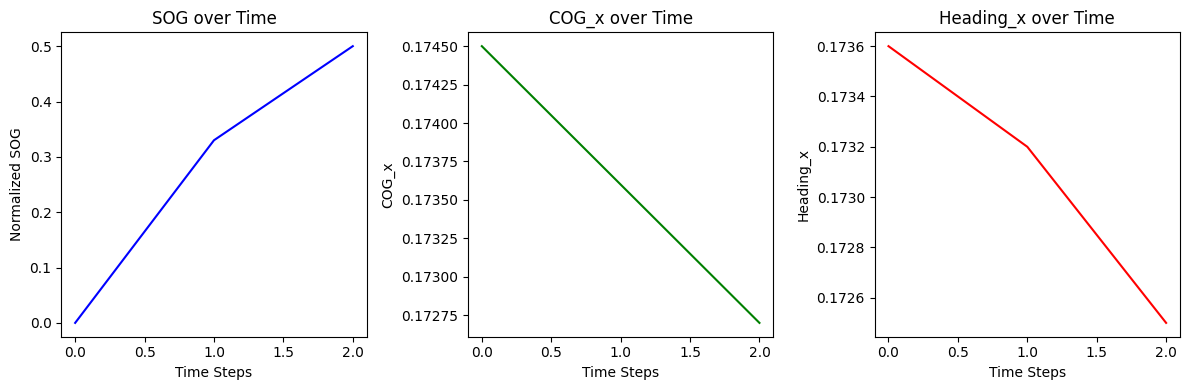

In [8]:
# Example sequences, like explained above.

import matplotlib.pyplot as plt

time_steps = [0, 1, 2]
SOG = [0.00, 0.33, 0.50]
COG_x = [0.1745, 0.1736, 0.1727]
Heading_x = [0.1736, 0.1732, 0.1725]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(time_steps, SOG, label="SOG", color="blue")
plt.title("SOG over Time")
plt.xlabel("Time Steps")
plt.ylabel("Normalized SOG")

plt.subplot(1, 3, 2)
plt.plot(time_steps, COG_x, label="COG_x", color="green")
plt.title("COG_x over Time")
plt.xlabel("Time Steps")
plt.ylabel("COG_x")

plt.subplot(1, 3, 3)
plt.plot(time_steps, Heading_x, label="Heading_x", color="red")
plt.title("Heading_x over Time")
plt.xlabel("Time Steps")
plt.ylabel("Heading_x")

plt.tight_layout()
plt.show()
